# Central Limit Theorem explained in two simple examples
By Josiah Sinclair

If a random variable "$s$" is the average of many other random variables "$x_1, x_2, ... x_i$" each sampled from a non-Gaussian distribution (e.g. a flat-topped distribution), what will the distribution of $s$ be?

To find out, let's start by imaging that my random variables $x_1, x_2, ... x_i$ are all sampled from the same distribution which is 0 everywhere except for being uniform in the interval {-1,1}. Below, I sample N times from this distribution and load the results into a data array $\vec{x} = \{x_1, x_2, ... x_i, ... x_{N}\}$. I then plot the elements of the elements of the array vs. index and show a histogram of $\{x_i\}$ which is distributed as expected. 

### First, import some useful Python packages

In [4]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy as sp
from scipy import signal as sig
from scipy.optimize import curve_fit

### Next, sample from a uniform distribution

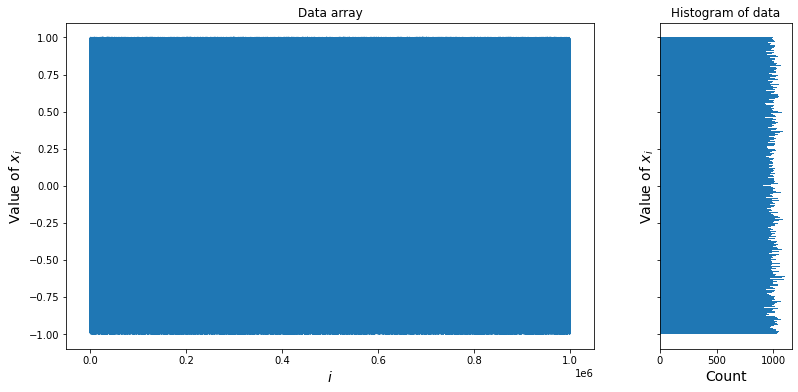

In [5]:
N = int(1e6)
s = np.random.uniform(-1,1,N)
index_s = np.arange(0,N,1)

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(index_s,s)
axes[0].set_xlabel("$i$", fontsize = 14)
axes[0].set_ylabel("Value of $x_i$", fontsize = 14)
axes[1].hist(s, bins=int(np.sqrt(N)), orientation='horizontal')
axes[1].set_xlabel("Count", fontsize = 14)
axes[1].set_ylabel("Value of $x_i$", fontsize = 14)
axes[1].set_title("Histogram of data")
axes[0].set_title("Data array")

plt.show()

I will now divide my dataset $\vec{s}$ containing $N$ values into $L$ smaller datasets of length $M$, where $M \times L = N$. The average of the $j$th smaller dataset will be $x_i$, and all the averages will define a new dataset $\vec{x} = \{x_1, x_2, ... x_j, ... x_L\}$ containing $L$ values. 

Mathematically, $x_j = \sum_{M \times j}^{M \times j + M}{s_{M \times j}}$, where $j$ is $0, 1, 2, ... L$.

What will be the distribution of $x_j$?

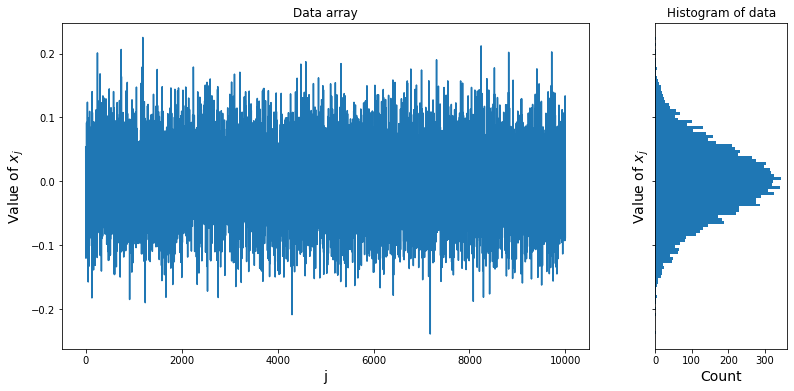

In [6]:
# Implement this by taking our length-N data array and reshaping it to be an array of size L by M. I can then average along the M axis to produce a new array of length L.
num_average = 100
len_of_x = int(N/num_average)
x = np.mean(np.reshape(s,(num_average,len_of_x)),0)
index_x = np.arange(0,len(x),1)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(index_x,x)
axes[0].set_xlabel("j", fontsize = 14)
axes[0].set_ylabel("Value of $x_j$", fontsize = 14)
axes[1].hist(x, bins=int(np.sqrt(len_of_x)), orientation='horizontal')
axes[1].set_xlabel("Count", fontsize = 14)
axes[1].set_ylabel("Value of $x_j$", fontsize = 14)
axes[1].set_title("Histogram of data")
axes[0].set_title("Data array")
plt.show()

Despite the fact that $x_i$ was produced by averaging independent variables $s_i$ sampled from a uniform (or flat-topped distribution), its distribution is clearly Gaussian. Amazing!

This is a classic example of the Central Limit Theorem, which says that when random independent variables are summed, their sums will be normally distributed, even if the variables themselves are not. 

### Next, let's look at a slightly less obvious example of the central limit theorem

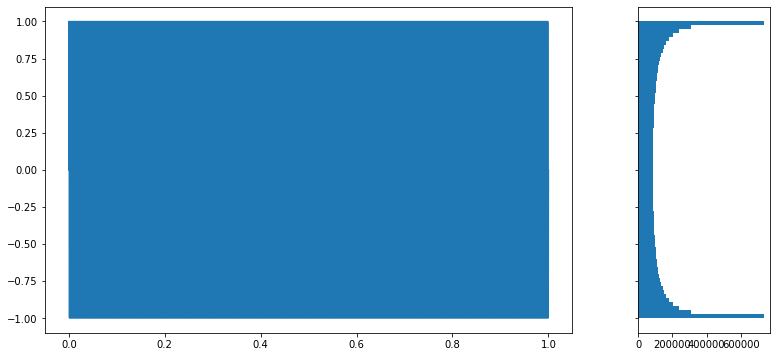

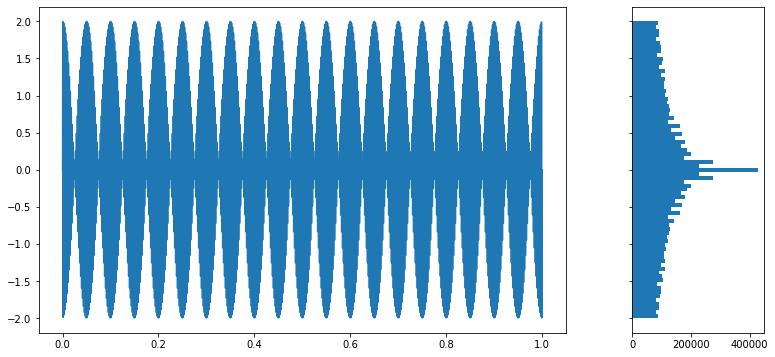

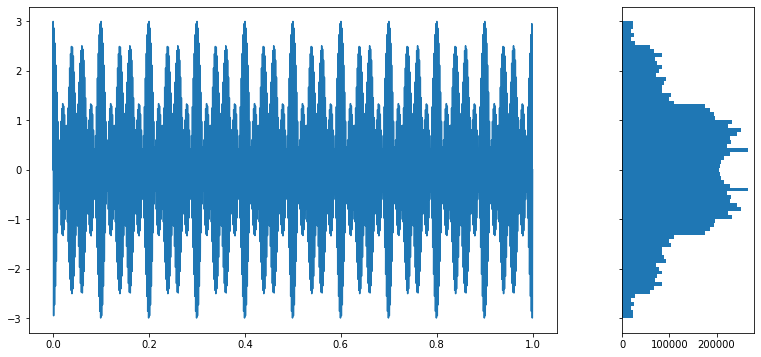

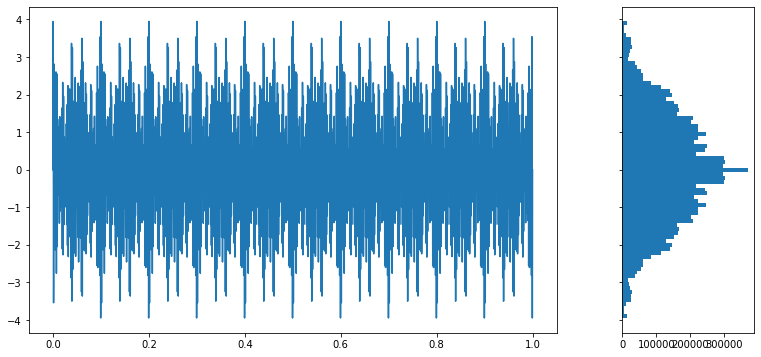

In [14]:
t = np.arange(0,1, 0.0000001)

f1 = 500
y1 = np.sin(2*np.pi*f1*t)

f2 = 520
y2 = np.sin(2*np.pi*f2*t)

f3 = 550
y3 = np.sin(2*np.pi*f3*t)

f4 = 650
y4 = np.sin(2*np.pi*f4*t)

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1)
axes[1].hist(y1, bins=75, orientation='horizontal')


fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1+y2)
axes[1].hist(y1+y2, bins=75, orientation='horizontal')

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1+y2+y3)
axes[1].hist(y1+y2+y3, bins=75, orientation='horizontal')

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1+y2+y3+y4)
axes[1].hist(y1+y2+y3+y4, bins=75, orientation='horizontal')

plt.show()

As you can see, the distribution of a sinusoid is extremely non-Gaussian, but it only takes two or three separate frequencies to create an oscillatory pattern whose distribution is quite Gaussian.

What if the frequencies are not close together, but are widely spaced, i.e. f1 = 500 Hz, f2 = 1000 Hz, f3 = 2000 Hz etc. 

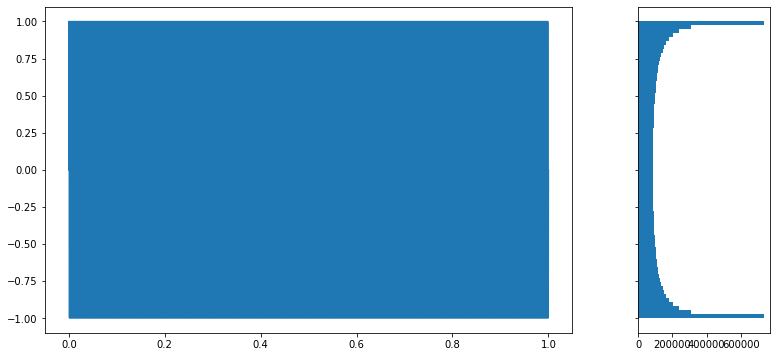

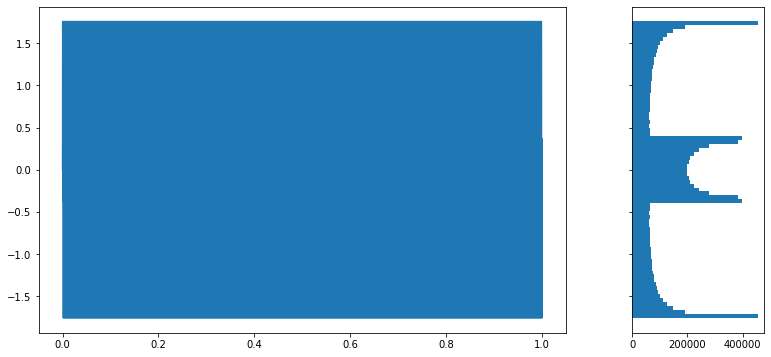

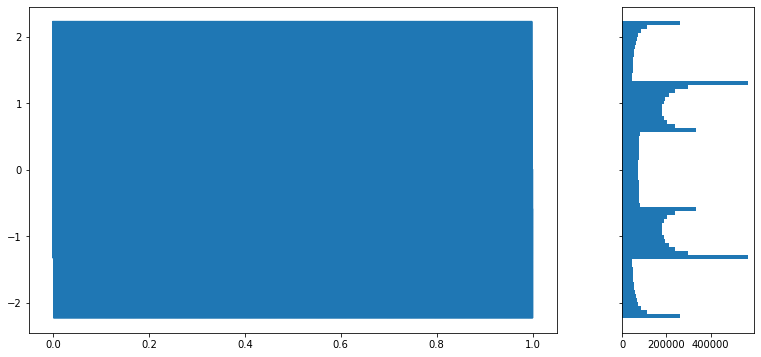

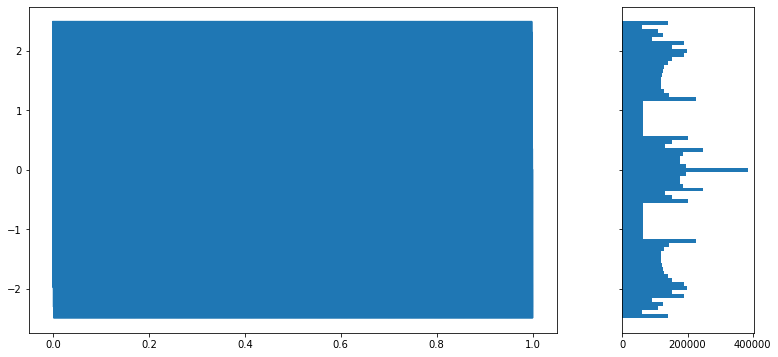

In [16]:
t = np.arange(0,1, 0.0000001)

f1 = 500
y1 = np.sin(2*np.pi*f1*t)

f2 = 1000
y2 = np.sin(2*np.pi*f2*t)

f3 = 2000
y3 = np.sin(2*np.pi*f3*t)

f4 = 4000
y4 = np.sin(2*np.pi*f4*t)

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1)
axes[1].hist(y1, bins=75, orientation='horizontal')


fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1+y2)
axes[1].hist(y1+y2, bins=75, orientation='horizontal')

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1+y2+y3)
axes[1].hist(y1+y2+y3, bins=75, orientation='horizontal')

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1+y2+y3+y4)
axes[1].hist(y1+y2+y3+y4, bins=75, orientation='horizontal')

plt.show()

Alright, so now because they are all multiples of each other we see no Gaussian distribution emerging. 

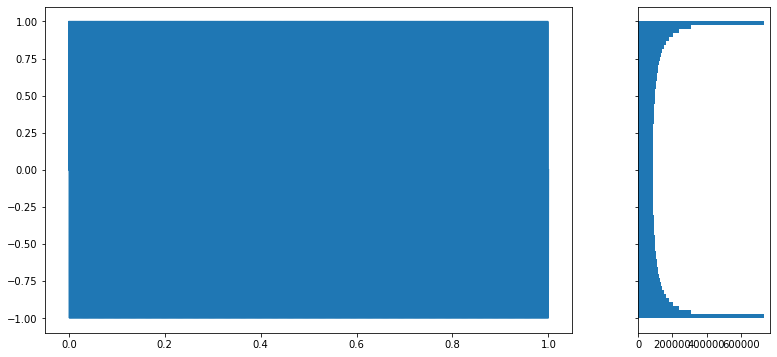

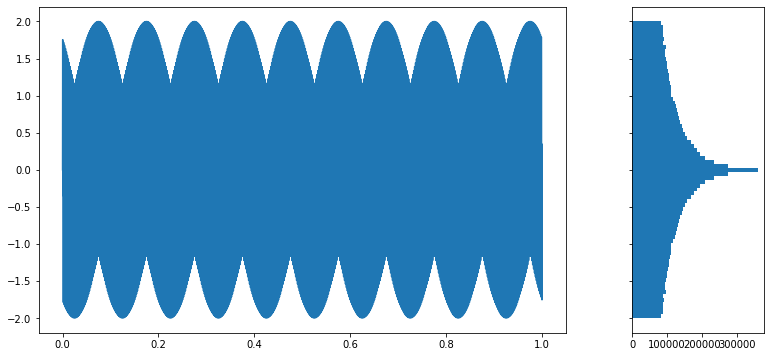

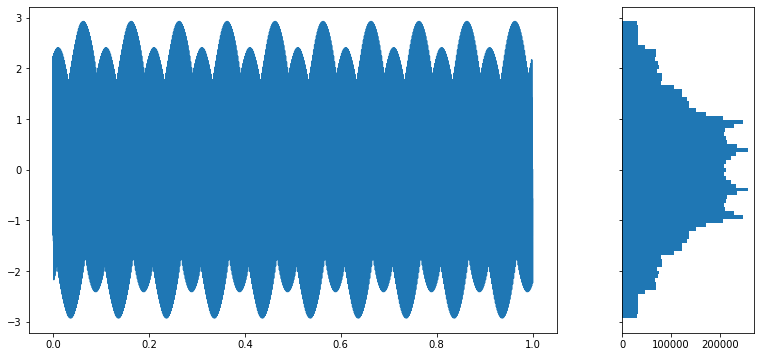

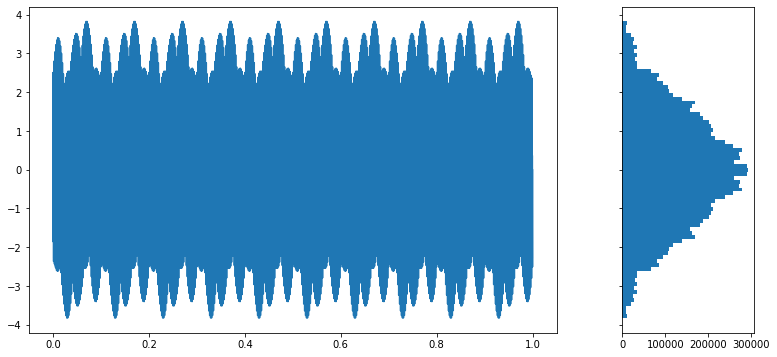

In [18]:
t = np.arange(0,1, 0.0000001)

f1 = 510
y1 = np.sin(2*np.pi*f1*t)

f2 = 1030
y2 = np.sin(2*np.pi*f2*t)

f3 = 2040
y3 = np.sin(2*np.pi*f3*t)

f4 = 4050
y4 = np.sin(2*np.pi*f4*t)

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1)
axes[1].hist(y1, bins=75, orientation='horizontal')


fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1+y2)
axes[1].hist(y1+y2, bins=75, orientation='horizontal')

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1+y2+y3)
axes[1].hist(y1+y2+y3, bins=75, orientation='horizontal')

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(t,y1+y2+y3+y4)
axes[1].hist(y1+y2+y3+y4, bins=75, orientation='horizontal')

plt.show()

As soon as the frequencies cease to be integer multiples of each other, the Gaussian distribution re-emerges. 

In [ ]:
s